In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Input
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train/255
X_test = X_test/255

In [4]:
model = keras.Sequential()

In [5]:
model.add(Input(X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(5, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile('adam', loss='categorical_crossentropy', metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 5)                 3925      
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
Total params: 3985 (15.57 KB)
Trainable params: 3985 (15.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
y_onehot_train = tf.one_hot(y_train, 10)
y_onehot_test = tf.one_hot(y_test, 10)
y_onehot_test[:5]

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)>

In [9]:
model_fit = model.fit(X_train, y_onehot_train, epochs=5, validation_data=(X_test, y_onehot_test))

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8425 - acc: 0.7388 - val_loss: 0.5664 - val_acc: 0.8370
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5324 - acc: 0.8427 - val_loss: 0.5007 - val_acc: 0.8532
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4751 - acc: 0.8609 - val_loss: 0.4558 - val_acc: 0.8688
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4312 - acc: 0.8766 - val_loss: 0.4214 - val_acc: 0.8800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4082 - acc: 0.8851 - val_loss: 0.4088 - val_acc: 0.8880


In [10]:
pred = model.predict(X_test[:50])
pred = np.array(pred)
pred = [np.argmax(prediction) for prediction in pred]

2/2 [==============================] - 0s 4ms/step


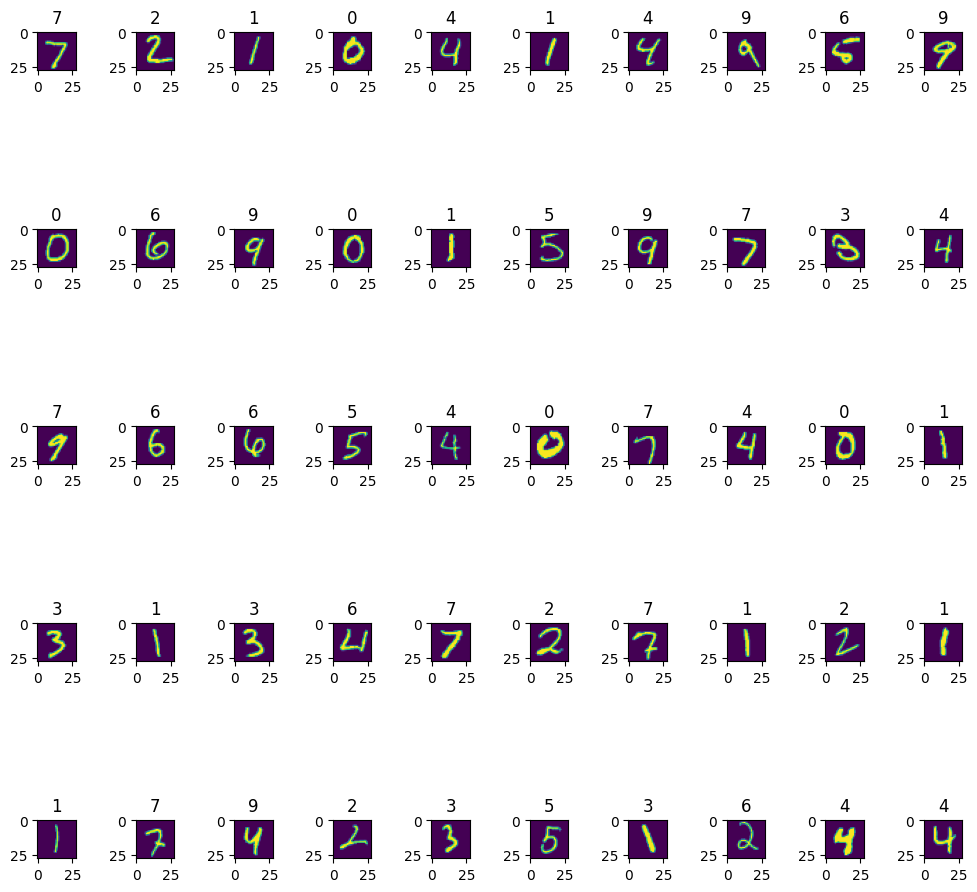

In [11]:
fig, ax = plt.subplots(5, 10, figsize=(10, 10))
fig.tight_layout()
for index, (img, pred) in enumerate(zip(X_test[:50], pred[:50])):
  ax[int(index/10%5), index%10].title.set_text(pred)
  ax[int(index/10%5), index%10].imshow(img)

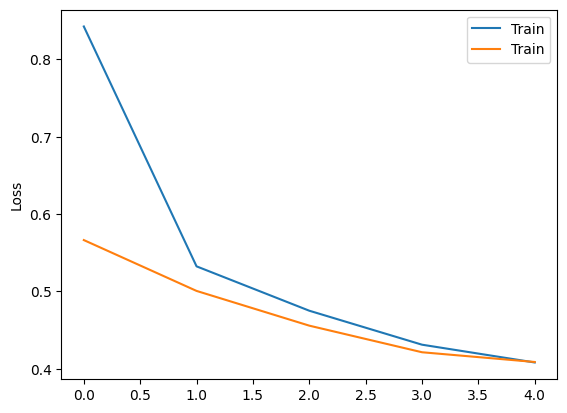

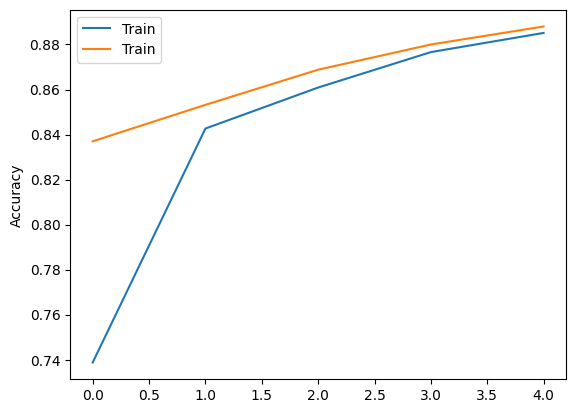

In [12]:
plt.plot(model_fit.history['loss'], label='Train')
plt.plot(model_fit.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_fit.history['acc'], label='Train')
plt.plot(model_fit.history['val_acc'], label='Validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()